In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("C:/Users/Laval/Downloads/MSCatUOM/data-science/project/data/Natera.csv")

In [3]:
df.head()

,Ticket Number,Date of Service,Carrier Code,Charges,Payments,Insurance Payment,Patient Payment,Writeoffs,FinancialClass,CPT,...,Payment Post Date,NPI,Ordering Clinic,Denied Code,First Billed Date,Provider Profile,Insurance Bal,Patient Bal,Allowed Amount,Case Count
0,104452,1/2/2019,CFHP-E2,"$3,900.00",$0.00,$0.00,$0.00,$0.00,NC - NON-CONTRACTED,81507,...,1/22/2019,1316428238,ALAMO WOMEN'S OBGYN,197,1/8/2019,NTINC,$0.00,"$3,900.00",$0.00,1
1,104453,1/2/2019,CFHP-E2,"$3,900.00",$0.00,$0.00,$0.00,$0.00,NC - NON-CONTRACTED,81507,...,1/24/2019,1316428238,ALAMO WOMEN'S OBGYN,197,1/8/2019,NTINC,$0.00,"$3,900.00",$0.00,1
2,104454,1/2/2019,NCS,$795.00,$249.00,$0.00,$249.00,$546.00,SP - SELF PAY,99999,...,2/10/2019,1699760116,COMPREHENSIVE WOMEN'S HEALTHCARE,-,-,NTINC,$0.00,$0.00,$0.00,1
3,104496,1/2/2019,AETLIF-E,"$3,900.00",$0.00,$0.00,$0.00,$0.00,CT - CONTRACTED,81420,...,1/28/2019,1609216597,PEACHTREE WOMEN'S CLINIC - NORTHSIDE,-,1/8/2019,NTINC,"$3,900.00",$0.00,$749.00,1
4,104497,1/2/2019,AETLIF-E,"$3,900.00",$0.00,$0.00,$0.00,$0.00,CT - CONTRACTED,81420,...,1/30/2019,1609216597,PEACHTREE WOMEN'S CLINIC - NORTHSIDE,-,1/8/2019,NTINC,"$3,900.00",$0.00,$749.00,1


Try without pre processing

In [4]:
df.describe()

,Ticket Number,NPI,Case Count
count,10357.000000,1.035700e+04,10357.0
mean,213621.134402,1.517730e+09,1.0
std,61672.060597,2.808536e+08,0.0
min,104452.000000,1.003002e+09,1.0
25%,173660.000000,1.285067e+09,1.0
50%,200932.000000,1.538167e+09,1.0
75%,263815.000000,1.750303e+09,1.0
max,407677.000000,1.992949e+09,1.0


In [5]:
df.describe(include=['object'])

,Date of Service,Carrier Code,Charges,Payments,Insurance Payment,Patient Payment,Writeoffs,FinancialClass,CPT,Date of Entry,Payment Post Date,Ordering Clinic,Denied Code,First Billed Date,Provider Profile,Insurance Bal,Patient Bal,Allowed Amount
count,10357,10357,10357,10357,10357,10357,10357,10357,10357,10357,10357,10353,10357,10357,10357,10357,10357,10357
unique,1,339,46,552,524,44,539,9,42,26,32,1057,55,27,2,56,312,212
top,1/2/2019,AETLIF-E,"$3,900.00",$0.00,$0.00,$0.00,$0.00,CT - CONTRACTED,81420,1/27/2019,-,MOORE OB/GYN,-,1/27/2019,NTINC,$0.00,$0.00,$0.00
freq,10357,965,1797,8989,9118,10228,7298,5093,1710,1928,3559,146,6298,1784,10246,5251,7084,7206


remove doller sign

In [6]:
def remove_doller_sign(col):
    df[coloumn] = pd.to_numeric(df[col].apply(lambda x: x.replace('$','')).apply(lambda x: x.replace(' ','')).apply(lambda x: x.replace(',','')).apply(lambda x: x.replace('(','')).apply(lambda x: x.replace(')','')))

In [7]:
coloumns = ['Payments', 'Charges', 'Insurance Payment', 'Patient Payment', 'Writeoffs', 'Insurance Bal', 'Patient Bal', 'Allowed Amount']
for coloumn in coloumns:
    remove_doller_sign(coloumn)

In [8]:
df.head()

,Ticket Number,Date of Service,Carrier Code,Charges,Payments,Insurance Payment,Patient Payment,Writeoffs,FinancialClass,CPT,...,Payment Post Date,NPI,Ordering Clinic,Denied Code,First Billed Date,Provider Profile,Insurance Bal,Patient Bal,Allowed Amount,Case Count
0,104452,1/2/2019,CFHP-E2,3900.0,0.0,0.0,0.0,0.0,NC - NON-CONTRACTED,81507,...,1/22/2019,1316428238,ALAMO WOMEN'S OBGYN,197,1/8/2019,NTINC,0.0,3900.0,0.0,1
1,104453,1/2/2019,CFHP-E2,3900.0,0.0,0.0,0.0,0.0,NC - NON-CONTRACTED,81507,...,1/24/2019,1316428238,ALAMO WOMEN'S OBGYN,197,1/8/2019,NTINC,0.0,3900.0,0.0,1
2,104454,1/2/2019,NCS,795.0,249.0,0.0,249.0,546.0,SP - SELF PAY,99999,...,2/10/2019,1699760116,COMPREHENSIVE WOMEN'S HEALTHCARE,-,-,NTINC,0.0,0.0,0.0,1
3,104496,1/2/2019,AETLIF-E,3900.0,0.0,0.0,0.0,0.0,CT - CONTRACTED,81420,...,1/28/2019,1609216597,PEACHTREE WOMEN'S CLINIC - NORTHSIDE,-,1/8/2019,NTINC,3900.0,0.0,749.0,1
4,104497,1/2/2019,AETLIF-E,3900.0,0.0,0.0,0.0,0.0,CT - CONTRACTED,81420,...,1/30/2019,1609216597,PEACHTREE WOMEN'S CLINIC - NORTHSIDE,-,1/8/2019,NTINC,3900.0,0.0,749.0,1


In [9]:
df.describe()

,Ticket Number,Charges,Payments,Insurance Payment,Patient Payment,Writeoffs,NPI,Insurance Bal,Patient Bal,Allowed Amount,Case Count
count,10357.000000,10357.000000,10357.000000,10357.000000,10357.000000,10357.000000,1.035700e+04,10357.000000,10357.000000,10357.000000,10357.0
mean,213621.134402,1602.650574,44.679865,41.129217,3.550648,493.463687,1.517730e+09,707.961028,355.345011,374.690578,1.0
std,61672.060597,1882.231263,211.645956,208.343187,40.978363,1215.058115,2.808536e+08,1478.907449,1066.710826,1006.419773,0.0
min,104452.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.003002e+09,0.000000,0.000000,0.000000,1.0
25%,173660.000000,175.000000,0.000000,0.000000,0.000000,0.000000,1.285067e+09,0.000000,0.000000,0.000000,1.0
50%,200932.000000,250.000000,0.000000,0.000000,0.000000,0.000000,1.538167e+09,0.000000,0.000000,0.000000,1.0
75%,263815.000000,3900.000000,0.000000,0.000000,0.000000,105.000000,1.750303e+09,250.000000,112.300000,208.090000,1.0
max,407677.000000,14697.000000,4600.000000,4600.000000,1590.000000,12737.000000,1.992949e+09,12737.000000,14697.000000,7200.000000,1.0


In [10]:
df.describe(include=['object'])

,Date of Service,Carrier Code,FinancialClass,CPT,Date of Entry,Payment Post Date,Ordering Clinic,Denied Code,First Billed Date,Provider Profile
count,10357,10357,10357,10357,10357,10357,10353,10357,10357,10357
unique,1,339,9,42,26,32,1057,55,27,2
top,1/2/2019,AETLIF-E,CT - CONTRACTED,81420,1/27/2019,-,MOORE OB/GYN,-,1/27/2019,NTINC
freq,10357,965,5093,1710,1928,3559,146,6298,1784,10246


In [11]:
df.to_csv("C:/Users/Laval/Downloads/MSCatUOM/data-science/project/data/Natera_process_data.csv")

In [13]:
df.shape

(10357, 21)

In [15]:
df.isnull().sum()

Ticket Number        0
Date of Service      0
Carrier Code         0
Charges              0
Payments             0
Insurance Payment    0
Patient Payment      0
Writeoffs            0
FinancialClass       0
CPT                  0
Date of Entry        0
Payment Post Date    0
NPI                  0
Ordering Clinic      4
Denied Code          0
First Billed Date    0
Provider Profile     0
Insurance Bal        0
Patient Bal          0
Allowed Amount       0
Case Count           0
dtype: int64

In [18]:
charges = df['Charges']

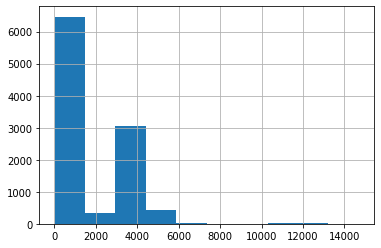

In [30]:
charges.hist()

In [28]:
charges.describe()

count    10357.000000
mean      1602.650574
std       1882.231263
min         10.000000
25%        175.000000
50%        250.000000
75%       3900.000000
max      14697.000000
Name: Charges, dtype: float64

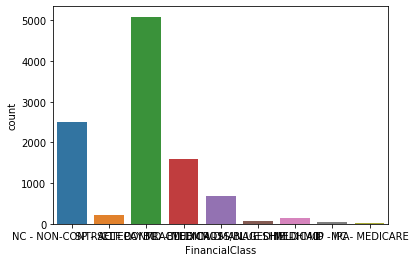

In [32]:
sns.countplot(df['FinancialClass'])

In [37]:
charges.head()

0    3900.0
1    3900.0
2     795.0
3    3900.0
4    3900.0
Name: Charges, dtype: float64

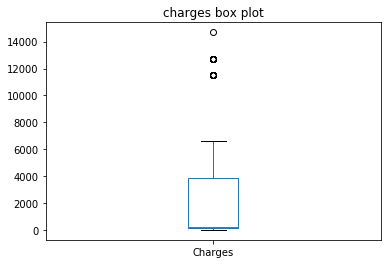

In [41]:
charges.plot(kind='box', title='charges box plot')

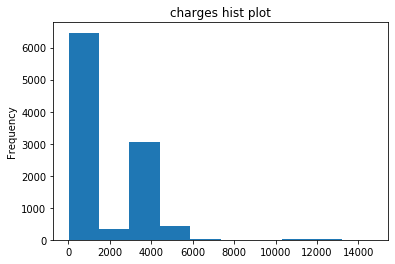

In [42]:
charges.plot(kind='hist', title='charges hist plot')

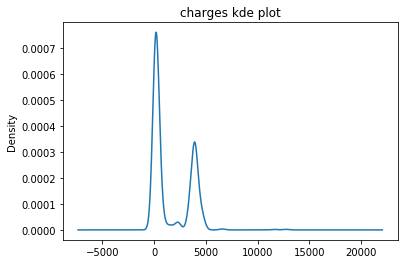

In [44]:
charges.plot(kind='kde', title='charges kde plot')

In [49]:
payments=df['Payments']

In [50]:
financialClass=df['FinancialClass']

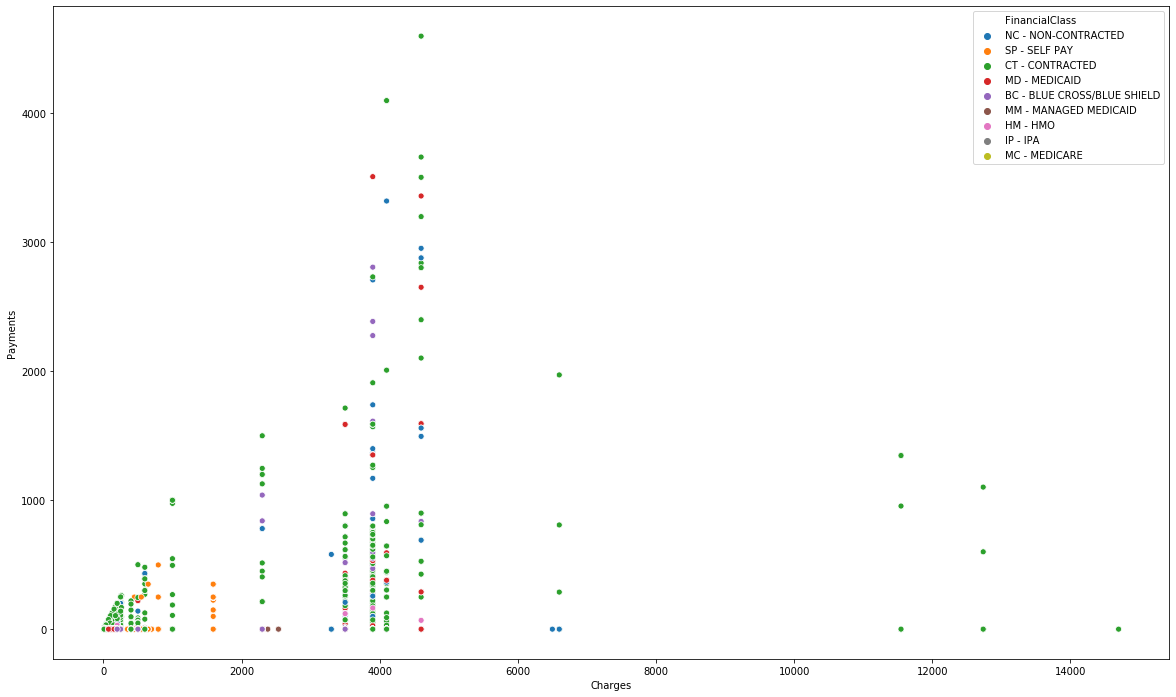

In [58]:
plt.figure(figsize=(20,12))
sns.scatterplot(x=charges, y=payments, hue=financialClass,data=df)

In [59]:
df_cov = df.cov()

In [60]:
df_cov

,Ticket Number,Charges,Payments,Insurance Payment,Patient Payment,Writeoffs,NPI,Insurance Bal,Patient Bal,Allowed Amount,Case Count
Ticket Number,3.803443e+09,-3.450805e+07,-1.112972e+06,-9.179294e+05,-1.950427e+05,-1.943764e+07,3.717420e+11,-2.903527e+06,-1.101397e+07,-1.418467e+06,0.0
Charges,-3.450805e+07,3.542795e+06,8.307076e+04,7.791491e+04,5.155853e+03,1.125465e+06,-9.276265e+09,1.556659e+06,7.726039e+05,-1.358508e+05,0.0
Payments,-1.112972e+06,8.307076e+04,4.479401e+04,4.326083e+04,1.533177e+03,8.086815e+04,-8.639457e+08,-3.086940e+04,-8.579461e+03,7.071249e+04,0.0
Insurance Payment,-9.179294e+05,7.791491e+04,4.326083e+04,4.340688e+04,-1.460495e+02,7.384660e+04,-6.793200e+08,-2.852814e+04,-7.430181e+03,7.058909e+04,0.0
Patient Payment,-1.950427e+05,5.155853e+03,1.533177e+03,-1.460495e+02,1.679226e+03,7.021550e+03,-1.846257e+08,-2.341254e+03,-1.149280e+03,1.234002e+02,0.0
Writeoffs,-1.943764e+07,1.125465e+06,8.086815e+04,7.384660e+04,7.021550e+03,1.476366e+06,-4.354020e+09,-3.455519e+05,-9.522516e+04,9.152176e+04,0.0
NPI,3.717420e+11,-9.276265e+09,-8.639457e+08,-6.793200e+08,-1.846257e+08,-4.354020e+09,7.887875e+16,-3.006025e+09,-1.885817e+09,4.327421e+09,0.0
Insurance Bal,-2.903527e+06,1.556659e+06,-3.086940e+04,-2.852814e+04,-2.341254e+03,-3.455519e+05,-3.006025e+09,2.187167e+06,-2.515941e+05,-2.303685e+05,0.0
Patient Bal,-1.101397e+07,7.726039e+05,-8.579461e+03,-7.430181e+03,-1.149280e+03,-9.522516e+04,-1.885817e+09,-2.515941e+05,1.137872e+06,-6.198241e+04,0.0
Allowed Amount,-1.418467e+06,-1.358508e+05,7.071249e+04,7.058909e+04,1.234002e+02,9.152176e+04,4.327421e+09,-2.303685e+05,-6.198241e+04,1.012881e+06,0.0


In [62]:
df_cor= df.corr()
df_cor

,Ticket Number,Charges,Payments,Insurance Payment,Patient Payment,Writeoffs,NPI,Insurance Bal,Patient Bal,Allowed Amount,Case Count
Ticket Number,1.000000,-0.297275,-0.085268,-0.071440,-0.077177,-0.259393,0.021462,-0.031834,-0.167421,-0.022853,NaN
Charges,-0.297275,1.000000,0.208528,0.198686,0.066846,0.492110,-0.017548,0.559216,0.384802,-0.071715,NaN
Payments,-0.085268,0.208528,1.000000,0.981083,0.176778,0.314464,-0.014534,-0.098623,-0.038002,0.331976,NaN
Insurance Payment,-0.071440,0.198686,0.981083,1.000000,-0.017107,0.291712,-0.011610,-0.092588,-0.033433,0.336650,NaN
Patient Payment,-0.077177,0.066846,0.176778,-0.017107,1.000000,0.141020,-0.016042,-0.038633,-0.026292,0.002992,NaN
Writeoffs,-0.259393,0.492110,0.314464,0.291712,0.141020,1.000000,-0.012759,-0.192298,-0.073470,0.074842,NaN
NPI,0.021462,-0.017548,-0.014534,-0.011610,-0.016042,-0.012759,1.000000,-0.007237,-0.006295,0.015310,NaN
Insurance Bal,-0.031834,0.559216,-0.098623,-0.092588,-0.038633,-0.192298,-0.007237,1.000000,-0.159482,-0.154776,NaN
Patient Bal,-0.167421,0.384802,-0.038002,-0.033433,-0.026292,-0.073470,-0.006295,-0.159482,1.000000,-0.057735,NaN
Allowed Amount,-0.022853,-0.071715,0.331976,0.336650,0.002992,0.074842,0.015310,-0.154776,-0.057735,1.000000,NaN


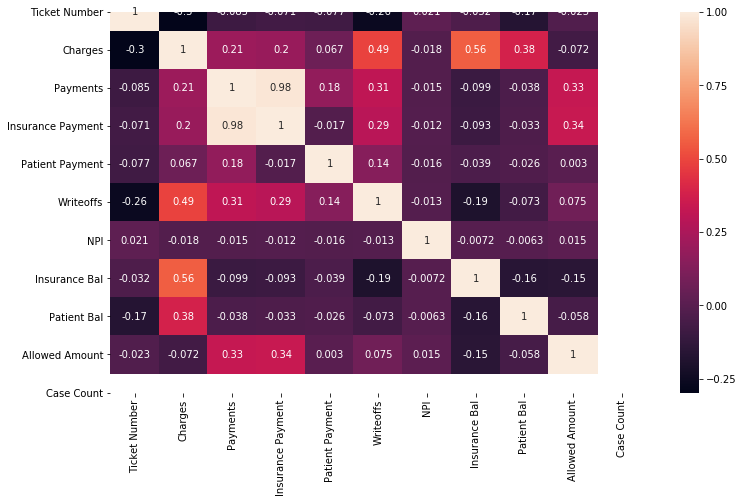

In [72]:
plt.figure(figsize=(12,7))
sns.heatmap(df_cor,annot=True)